In [1]:
import numpy as np
from data_utils import load_data, categorical_to_int
from perf_utils import aggregation_, avg_, TopPercent
from plot_utils import plot_top_cycle, plot_EF
from config import n_ensemble, n_init, n_est, seed_list, categories
import math

# Data load and process

In [2]:
dataset_name = 'GOQ'
unique_ds, feature_name, objective_name = load_data(
    dataset_name, invert_y=True)

print(f"##### START: {dataset_name} #####\n")
unique_ds = categorical_to_int(
    unique_ds, col_name='gas', categories=categories)
X_feature = unique_ds[feature_name].values
y = np.array(unique_ds[objective_name].values)
n_dataset = len(unique_ds)
# print(f"Number of data in set: {n_dataset}")

# number of top candidates, currently using top 5% of total dataset size
n_top = int(math.ceil(len(y)*.05))
top_indices = list(unique_ds.sort_values(objective_name).head(n_top).index)
print(f"length dataset: {n_dataset}, nr of top candidates: {n_top}")
unique_ds.head()

##### START: GOQ #####

length dataset: 208, nr of top candidates: 11


,power,time,gas,pressure,target
0,10,9055,1,580,-1.046820
1,19,2960,2,70,-1.026473
2,44,3012,2,70,-1.032122
3,83,8031,3,610,0.000000
4,121,3049,2,60,-1.046390


In [3]:
# Load ensemble calculation results from framework
# for 50 ensembles, they take some time to run
# we therefore provide sample results for BO algorithm GP_Matern52_LCB2
# please retrieve the following files from vis_demo_calc folder

# TopCount_collection_GP_Matern52_LCB2 = np.load('test_run.npy', allow_pickle = True)
# Please replace the above line with the below code if you ran benchmarking framework on your own dataset and obtained results locally. .
test_run_results = np.load('EI_GOQ.npy', allow_pickle = True) 
TopCount_collection_GP_Matern52_LCB2 = test_run_results[3]
test_run_results[4]/3600

3.246216423944441

In [4]:
# Aggregating the performance
TopPercent_GP_Matern52_LCB2 = avg_(TopPercent(TopCount_collection_GP_Matern52_LCB2, n_top, n_dataset))

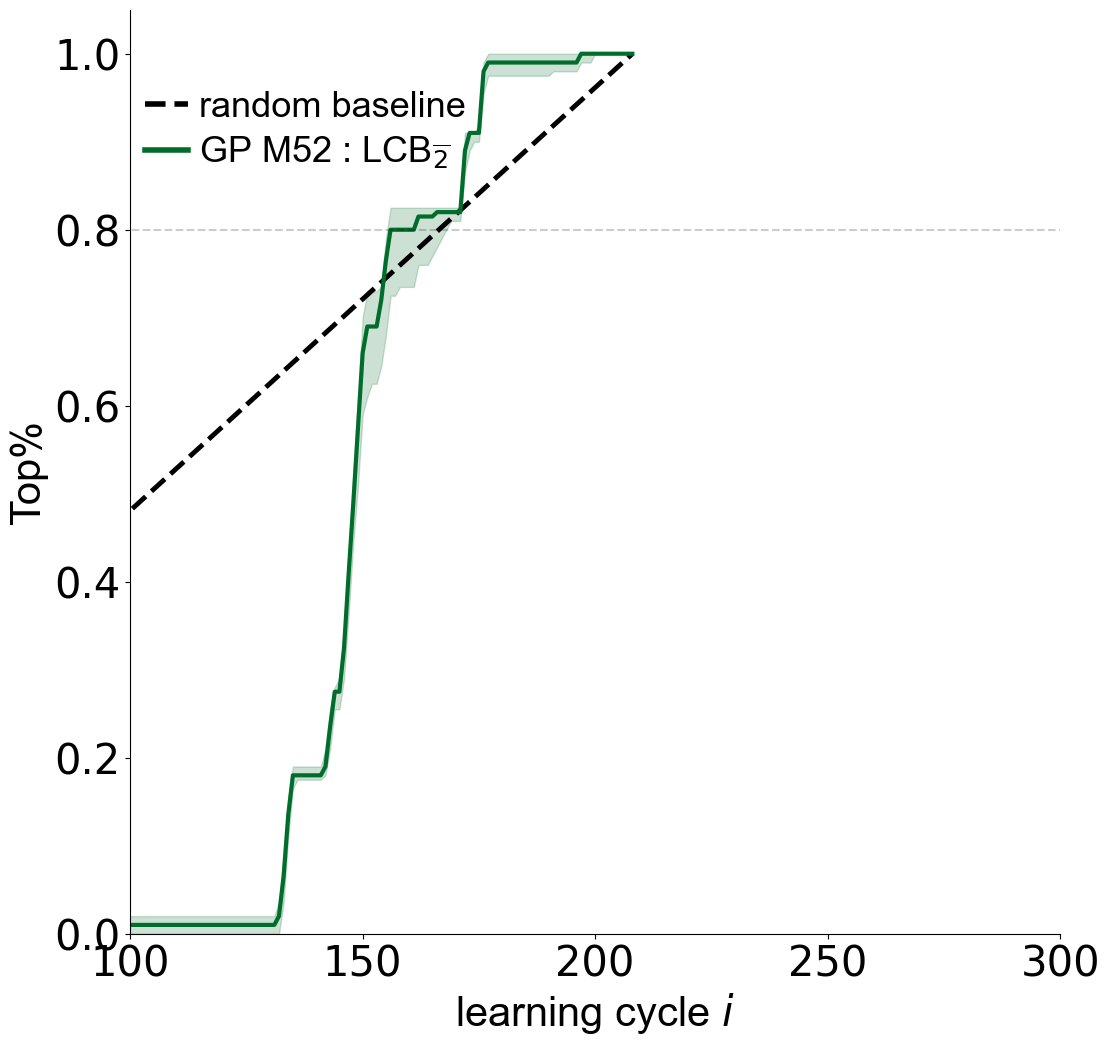

In [5]:
plot_top_cycle(n_dataset,n_top, TopPercent_GP_Matern52_LCB2)

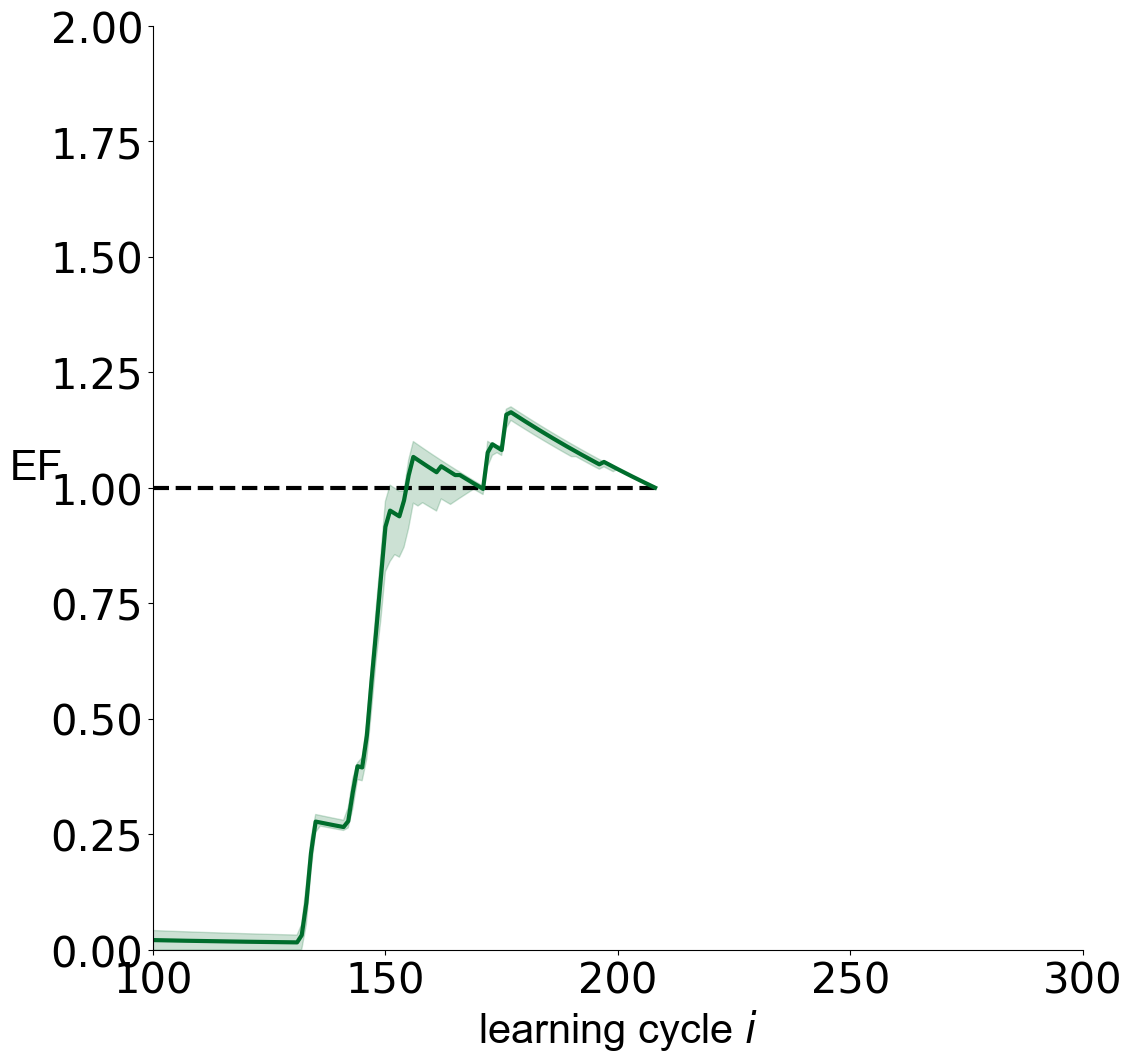

In [6]:
plot_EF(n_dataset, n_top, TopPercent_GP_Matern52_LCB2)